In [1]:
import numpy as np     #imported all library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/vis2208/Air-Pollution-/main/Processed_data.csv")   #read data
df.head(5)

,Date,PM2.5,PM10,NO2,SO2,CO,RH,WS,WD,SR,AT
0,03/01/2018,287.71,488.92,86.46,20.49,1.82,67.28,0.32,248.70,167.41,12.41
1,15/01/2018,240.96,515.83,101.49,20.95,1.84,50.45,0.71,264.26,169.86,15.98
2,17/01/2018,294.38,402.21,72.23,17.61,1.20,64.78,1.19,88.52,166.50,14.02
3,23/01/2018,196.40,322.72,86.80,24.86,2.09,61.87,1.82,114.02,149.21,14.05
4,24/01/2018,162.97,239.81,72.06,25.29,2.08,66.09,0.71,240.56,198.31,13.42


In [3]:
# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size = 0.8

X = df.drop(columns = ['PM2.5','Date']).copy()
y = df['PM2.5']

# In the first step we will split the data in training and validation dataset
X_train, X_valid, y_train, y_valid = train_test_split(X,y, train_size=0.8, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(2581, 9)
(2581,)
(646, 9)
(646,)


In [4]:
regr_1 = RandomForestRegressor(n_estimators = 50) 

regr_2 = AdaBoostRegressor(RandomForestRegressor(n_estimators = 50))

In [5]:
regr_2.fit(X_train,y_train)
y_pred = regr_2.predict(X_valid)                  # predicted

In [6]:
regr_2.score(X_valid,y_valid)

0.8180624648265109

In [7]:
print("Printing training stats")
y_pred_train = regr_2.predict(X_train) 
print("Mean absolute error: %.2f" % mean_absolute_error(y_train, y_pred_train)) # mean absolute error 
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred_train)) # The mean squared error
print("Root mean square error: %.2f" % sqrt(mean_squared_error(y_train, y_pred_train))) # RMSE
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred_train)) # The coefficient of determination: 1 is perfect prediction

Printing training stats
Mean absolute error: 4.96
Mean squared error: 30.40
Root mean square error: 5.51
Coefficient of determination: 0.99


In [8]:
print("Printing testing stats")
print("Mean absolute error: %.2f" % mean_absolute_error(y_valid, y_pred)) # mean absolute error 
print("Mean squared error: %.2f" % mean_squared_error(y_valid, y_pred)) # The mean squared error
print("Root mean square error: %.2f" % sqrt(mean_squared_error(y_valid, y_pred))) # RMSE
print("Coefficient of determination: %.2f" % r2_score(y_valid, y_pred)) # The coefficient of determination: 1 is perfect prediction

Printing testing stats
Mean absolute error: 17.68
Mean squared error: 693.17
Root mean square error: 26.33
Coefficient of determination: 0.82


In [9]:
for Y, y in zip(y_valid, y_pred):
  print(round(Y), round(y))

56 114
178 220
61 81
95 46
81 153
117 101
86 96
183 170
69 79
39 34
135 115
94 92
179 137
99 150
104 94
153 125
58 77
143 111
39 44
102 111
86 108
176 134
117 139
250 132
105 80
106 97
132 95
72 90
190 235
191 164
105 119
44 38
149 115
103 96
78 44
112 107
70 117
272 234
193 201
144 171
32 42
136 109
54 45
37 59
92 54
79 51
25 35
27 41
9 20
52 78
40 32
63 254
81 65
60 64
87 109
242 204
178 160
75 113
109 124
53 59
38 55
66 64
150 126
211 172
107 73
155 129
148 115
40 40
26 41
20 20
72 77
39 44
69 62
84 51
38 44
77 97
110 113
54 74
159 168
52 54
70 59
85 113
58 57
61 55
111 84
80 78
145 115
44 70
103 106
82 78
129 93
159 141
109 126
221 204
78 94
48 50
166 138
49 69
36 49
61 50
77 117
69 65
141 119
28 43
259 163
102 109
115 75
126 103
138 115
42 38
33 46
40 34
267 241
178 80
77 77
52 90
132 115
121 106
40 70
106 125
192 184
121 103
58 41
18 35
32 33
201 164
104 118
31 36
155 179
15 18
74 63
100 75
57 44
51 64
51 55
68 99
70 110
16 19
64 51
206 171
91 103
89 70
40 42
98 80
141 131
149 23

Text(0, 0.5, 'y_pred')

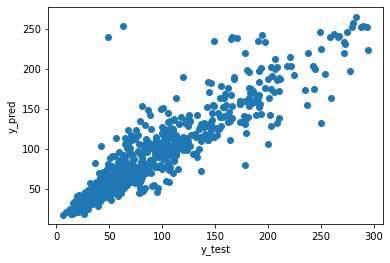

In [10]:
plt.scatter(y_valid, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")